# Problem 5.1: Solar Power - data reader

The following is a small program to read the data file "data_SolarPower.txt", which contains three columns: Year, cumulative solar power capacity (in MW), and Price (USD/Watt installed)

### Author & Date: 
- Troels C. Petersen (Niels Bohr Institute)
- 07-11-2021

***

In [1]:
# Read the data and print it to check it:
import numpy as np
import matplotlib.pyplot as plt

from ExternalFunctions import Chi2Regression

from scipy import stats
from iminuit import Minuit                             # The actual fitting tool, better than scipy's

In [2]:
year, capacity, price = np.loadtxt("data_SolarPower.txt", skiprows=2, delimiter="\t", unpack=True)

print("Number of entries: ", len(year))
for i in range(len(year)) : 
    print(f"  {int(year[i]):4d}:  {capacity[i]:10.2f}   {price[i]:7.3f}")

Number of entries:  44
  1976:        0.30   106.100
  1977:        0.85    80.630
  1978:        1.80    56.230
  1979:        3.30    47.740
  1980:        6.50    35.010
  1981:       12.50    26.520
  1982:       20.00    22.280
  1983:       43.00    19.090
  1984:       67.00    16.970
  1985:       90.00    14.850
  1986:      120.00    11.140
  1987:      150.00     8.486
  1988:      175.00     7.532
  1989:      220.00     8.168
  1990:      270.00     8.805
  1991:      330.00     7.956
  1992:      400.00     7.213
  1993:      450.00     7.107
  1994:      500.00     6.365
  1995:      575.00     5.834
  1996:      700.00     6.046
  1997:      800.00     6.365
  1998:      975.00     5.728
  1999:     1250.00     5.092
  2000:     1500.00     4.879
  2001:     1750.00     4.773
  2002:     2300.00     4.031
  2003:     3000.00     3.978
  2004:     4300.00     4.137
  2005:     6000.00     4.243
  2006:     8500.00     4.455
  2007:    10300.00     4.137
  2008:    20000.

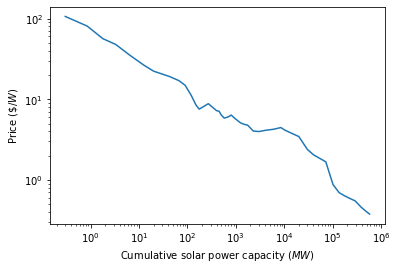

In [3]:
fig1, ax1 = plt.subplots()
ax1.plot(capacity, price)

ax1.set_xlabel(r'Cumulative solar power capacity ($MW$)')
ax1.set_ylabel(r'Price ($\$/W$)')

ax1.set_xscale('log')
ax1.set_yscale('log')

plt.show()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 86.6                       │              Nfcn = 146              │
│ EDM = 8.77e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   72.9    │    3.4    │            │            │         │         │       │
│ 1 │ b    │   0.381   │   0.006   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────┐
│   │        a        b │
├───┼───────────────────┤
│ a │     11.2   0.0164 │
│ b │   0.0164 3.23e-05 │
└───┴───────────────────┘

Chi2 value: 86.6   Ndof = 42    Prob(Chi2,Ndof) = 0.0000622638


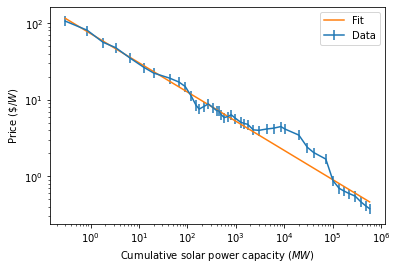

In [4]:
sigma_price = price*0.15

def power_law(x,a,b):
    return a*x**(-b)

# Do a chi2 fit
chi2_pl = Chi2Regression(power_law, capacity, price, sigma_price)
chi2_pl.errordef = 1
minuit_chi2_pl = Minuit(chi2_pl, a=1, b=1) #   
display(minuit_chi2_pl.migrad())          # Perform the actual fit

a_fit = minuit_chi2_pl.values[0]
b_fit = minuit_chi2_pl.values[1]

# Get number of degrees-of-freedom (Ndof):
Ndof_value = len(price) - minuit_chi2_pl.nfit

chi2_pl_value = minuit_chi2_pl.fval
p_value = stats.chi2.sf(chi2_pl_value, Ndof_value) # The chi2 probability given N_DOF degrees of freedom
print(f"Chi2 value: {chi2_pl_value:.1f}   Ndof = {Ndof_value:.0f}    Prob(Chi2,Ndof) = {p_value:5.10f}")


# Plot
x_axis = np.linspace(np.min(capacity), np.max(capacity), 1000)

fig2, ax2 = plt.subplots()
ax2.errorbar(capacity, price, yerr=sigma_price, label='Data')
ax2.plot(x_axis, power_law(x_axis,a_fit,b_fit),label='Fit')

ax2.set_xlabel(r'Cumulative solar power capacity ($MW$)')
ax2.set_ylabel(r'Price ($\$/W$)')

ax2.set_xscale('log')
ax2.set_yscale('log')

ax2.legend()

plt.show()

<ipython-input-6-653965fce0de>:3: RuntimeWarning: overflow encountered in exp
  return a*np.exp((x-b)*c) + d
../External_Functions\ExternalFunctions.py:121: RuntimeWarning: overflow encountered in square
  chi2 = np.sum(self.weights*(self.y - f)**2/self.sy**2)


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 5.103e+04                  │              Nfcn = 465              │
│ EDM = 3.05e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │  0.0493   │  0.0013   │            │            │         │         │       │
│ 1 │ b    │ 1.96459e3 │ 0.00008e3 │            │            │         │         │       │
│ 2 │ c    │ 301.47e-3 │  0.17e-3  │            │            │         │         │       │
│ 3 │ d    │   -0.4    │    0.4    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────────────────────────┐
│   │         a         b         c         d │
├───┼─────────────────────────────────────────┤
│ a │  1.64e-06  9.51e-05 -8.84e-08 -1.37e-05 │
│ b │  9.51e-05   0.00622 -1.06e-06  -0.00016 │
│ c │ -8.84e-08 -1.06e-06  2.86e-08   4.4e-06 │
│ d │ -1.37e-05  -0.00016   4.4e-06     0.175 │
└───┴─────────────────────────────────────────┘

Chi2 value: 51031.3   Ndof = 40    Prob(Chi2,Ndof) = 0.0000000000


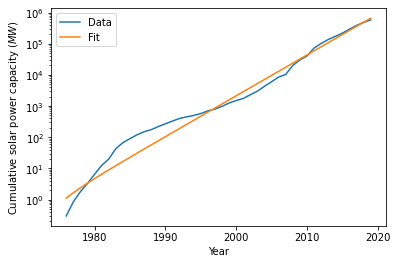

In [6]:
# The data looks exponential to me
def exponential(x, a,b,c,d):
    return a*np.exp((x-b)*c) + d

# Do a chi2 fit
chi2_exp = Chi2Regression(exponential, year, capacity, np.sqrt(capacity)) # No uncertainty known on capacity -> Pearson chi2
chi2_exp.errordef = 1
minuit_chi2_exp = Minuit(chi2_exp, a=1, b=2000, c=1, d=1) #   
display(minuit_chi2_exp.migrad())          # Perform the actual fit

a_fit = minuit_chi2_exp.values[0]
b_fit = minuit_chi2_exp.values[1]
c_fit = minuit_chi2_exp.values[2]
d_fit = minuit_chi2_exp.values[3]

# Get number of degrees-of-freedom (Ndof):
Ndof_value = len(price) - minuit_chi2_exp.nfit

chi2_exp_value = minuit_chi2_exp.fval
p_value = stats.chi2.sf(chi2_exp_value, Ndof_value) # The chi2 probability given N_DOF degrees of freedom
print(f"Chi2 value: {chi2_exp_value:.1f}   Ndof = {Ndof_value:.0f}    Prob(Chi2,Ndof) = {p_value:5.10f}")


x_axis = np.linspace(np.min(year),np.max(year),1000)
fig3, ax3 = plt.subplots()
ax3.plot(year, capacity, label='Data')
ax3.plot(x_axis,exponential(x_axis,a_fit,b_fit,c_fit,d_fit),label='Fit')

ax3.set_xlabel(r'Year')
ax3.set_ylabel(r'Cumulative solar power capacity ($MW$)')

ax3.set_yscale('log')

ax3.legend()
plt.show()